## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
#import all libraries 

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
# reading the ab_data file
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
# to know how many rows in the dataset

df.shape[0]

294478

c. The number of unique users in the dataset.

In [6]:
# using nunique() function to return number of unique values in the "user_id" column
user_unique = df['user_id'].nunique()

print(user_unique)

290584


d. The proportion of users converted.

In [7]:
# first make a query to know how many converted users, then find the proporation of it.

users_converted = df.query('converted == 1')['user_id'].nunique()
pr = users_converted / user_unique
print("The proportion of users converted is {0:.2%}".format(pr))


The proportion of users converted is 12.10%


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# There are many wayes of new_page doesn't match treatment. 
# First, if group column doesn't match treatment. Second, if the landing_page column doesn't equal new_page

n_page_dm = df.query('landing_page == "new_page" and group !="treatment" ' )['user_id'].nunique()
n_page_dm1 = df.query('landing_page != "new_page" and group =="treatment" ' )['user_id'].nunique()

print(n_page_dm + n_page_dm1)


3893


f. Do any of the rows have missing values?

In [9]:
# check if any rows have missing values.
df.isnull().any(axis = 1).sum()

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#copying df into df2
df2 = df
df2.shape

(294478, 5)

In [11]:
# delete all the rows where  treatment does not match with new_page or control does not match with old_page
df2 = df[((df.group == 'treatment' ) & (df.landing_page == 'new_page'))  |  ((df.group == 'control') & (df.landing_page == 'old_page')) ]
df2.shape

(290585, 5)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# to check how many unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# to know which is the duplicated row
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
# to know which is the duplicated row

df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# removing the duplicated row
df2 = df2.drop_duplicates()

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# the average of converted column
df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# calculate the control group 
control_group = len(df2.query('group == "control" and converted == 1'))/len(df2.query('group == "control"'))
control_group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# calculate the treatment group 

treatment_group = len(df2.query('group == "treatment" and converted == 1'))/len(df2.query('group == "control"'))
treatment_group

0.1188375070556328

d. What is the probability that an individual received the new page?

In [20]:
# calculate the average of new page 

p = df2.query(' landing_page == "new_page" ' ).shape[0] / df2.shape[0]
p

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**

The probability of an individual received the new page is almost equal with the probability of an individual received the control page. There is no evidence to conclude that the new treatment page leads to more conversions than the old control page. 


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

**$H_{0}$** = **$p_{new}$**  - **$p_{old}$**  ≤ 0

**$H_{1}$** = **$p_{new}$**  - **$p_{old}$**  > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#calculate conversion rate for P_new
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#calculate conversion rate for P_old
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
#using len() to know how many rows have treatment value
n_new = len(df2.query('group == "treatment" '))
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
#using len() to know how many rows have control value
n_old = len(df2.query('group == "control" '))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new])
new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
dif = new_page_converted.mean() - old_page_converted.mean()
dif

0.0010914868782681691

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   8.,   68.,  419., 1387., 2566., 2903., 1787.,  716.,  124.,
          22.]),
 array([-0.00472432, -0.00380896, -0.00289359, -0.00197822, -0.00106285,
        -0.00014749,  0.00076788,  0.00168325,  0.00259862,  0.00351398,
         0.00442935]),
 <a list of 10 Patch objects>)

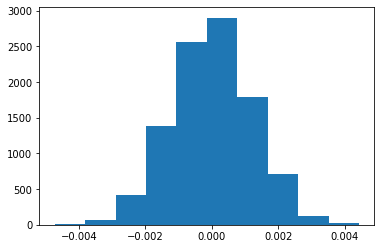

In [29]:
# illustrate p_diffs array using a histogram
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# calculate the difference 
actual =  treatment_group - control_group 
actual

-0.0015487974448284009

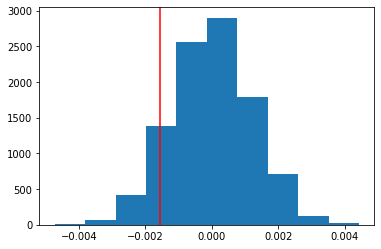

In [31]:
plt.hist(p_diffs)
plt.axvline(actual, color='r')

In [32]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > actual).mean()
p_val

0.9003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer** 

The p-value in this study is 0.905. We fail to reject  the null hypothesis. That's means the null hypothesis is true. therefore, we cannot conclude that a significant difference exists. 


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" and converted ==1 '))
convert_new = len(df2.query('landing_page == "new_page" and converted ==1'))
n_old = len(df2.query('landing_page == "old_page" '))
n_new = len(df2.query('landing_page == "new_page" '))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3116075339133115 0.905173705140591


In [35]:
from scipy.stats import norm

#To know how significant our z-score is

norm.cdf(z_score)

0.09482629485940902

In [36]:
# To know what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**
The z-score of -1.31 does not exceed the critical value at 95% confidence - which is 1.96, we fail to reject the null hypothesis that control group using old page has a better or equal converted rate than treatment group who use the new page. 
This conclusion is the same as parts J. and K. findings. 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

We should use a logistic regression to predict a probability between 0 and 1.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# create an intercept column,  create a dummy variable column 
# using 1 for ab_page if group receives the treatment  

df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
# fit a logistic regression  

lm = sm.Logit( df2['converted'], df2[['intercept','ab_page']])
results = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# summaty of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:               8.085e-06
Time:                        15:40:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**

The p-value associated with ab_page is 0.190.The p-value from part III shows is more than 0.05, which means we fail to reject the null hypothesis that both pages have equal effectiveness at converting users.

In part II, the null hypothesis was that the old page was more effective or equal than the new page.

In part III, we assume that the null hypothesis is the old page has the same effectiveness as the new page and the alternative hypotheses is that the new page effectiveness is not equal than the old page. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

In my opinion, adding more variables to the regression model may be useful to predict conversion, for example, to allow us check if the converted rate depends on certain time of the day. However, we may face some disadvanteges such as outliers or multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# reading countries file and join df2 with countries dataset
df3= pd.read_csv('countries.csv')
df3 = df3.set_index('user_id').join(df2.set_index('user_id'), how='left')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0


In [41]:
#create 3 columns foe each country
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3= df3.drop(['country', 'CA'], axis=1)


In [42]:
##Create Logit regression model for conveted and country.
logit2 = sm.Logit(df3['converted'], df3[['intercept','US','UK']])
results2 = logit2.fit()

# to show the summatu of the result
results2.summary()


Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        15:40:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

> Based on the p-values above, that mean country has not a significant impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# create an interaction between page and country 
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']

In [44]:
#create logistic regression for the intereaction variable between new page and country using dummy variable
logit3 = sm.Logit(df3['converted'], df3[['intercept','US_ab_page','UK_ab_page','ab_page']])
results3 = logit3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:               3.352e-05
Time:                        15:40:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06778
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
US_ab_page    -0.0644      0.038     -1.678      0.093      -0.140       0.011
UK_ab_page     0.0257      0.019      1.364      0.173      -0.011       0.063
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
==============================================================================
"""

In [45]:
np.exp(results3.params)

intercept     0.136863
US_ab_page    0.937629
UK_ab_page    1.025997
ab_page       0.981890
dtype: float64

 Based on the results, the p-values for all countries are more than 0.05 which means that the ab_page and country were statistically insignificant in predicting the conversion of users.



**Conclusion**
This project aims to figuring out if the new page make an improvment or should keep the old page, or it may needs more running time to have a clear decision. 

In part II, we assumed that the null hypothesis was that the old page was more effective or equal than the new page. This study concluded that with a p-value, z-secore of 0.905 and -1.31, respectively. We failed to reject the null hypothesis.


In part III, We used the logistic regression model to calculate the p-value. The results also could not reject the null hypothesis.

Additionally, we introduced another factor into the regression model, which is based on country a user lives in. As the resulte,there was not a significant evidence that the user's country effect on the converted rate. 

To conclude, there is no evidence that the new page has a higher conversion rates.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1